In [1]:
# ===========================
# 1) Load libraries
# ===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set notebook defaults
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# ===========================
# 2) Create synthetic dataset
# ===========================
# Define sample data
np.random.seed(42)

n_samples = 500

# Example model names
models = ["Chevrolet Spark", "Chevrolet Trailblazer", "Chevrolet Camaro", "Chevrolet Malibu"]

# Demographics: approximate age distribution
age_groups = ["18-24", "25-34", "35-44", "45-54", "55+"]

# UK regions (simplified)
regions = ["London", "South East", "North West", "Scotland", "Wales"]

data = {
    "SaleID": np.arange(1, n_samples + 1),
    "Date": pd.date_range(start="2024-01-01", periods=n_samples, freq="D"),
    "Model": np.random.choice(models, size=n_samples),
    "Units_Sold": np.random.randint(1, 10, size=n_samples),  # individual sales or small batch counts
    "Profit_Margin_%": np.round(np.random.uniform(5, 25, size=n_samples), 2),
    "Buyer_Age_Group": np.random.choice(age_groups, size=n_samples),
    "Region": np.random.choice(regions, size=n_samples)
}

# Build DataFrame
df_chevrolet_uk = pd.DataFrame(data)

# Preview data
df_chevrolet_uk.head()

,SaleID,Date,Model,Units_Sold,Profit_Margin_%,Buyer_Age_Group,Region
0,1,2024-01-01,Chevrolet Camaro,5,12.38,55+,South East
1,2,2024-01-02,Chevrolet Malibu,7,14.09,35-44,South East
2,3,2024-01-03,Chevrolet Spark,1,15.97,18-24,Wales
3,4,2024-01-04,Chevrolet Camaro,3,15.98,35-44,Scotland
4,5,2024-01-05,Chevrolet Camaro,2,9.03,35-44,Wales


In [3]:
# ===========================
# 3) Summary statistics
# ===========================
# Overall summary
df_chevrolet_uk.describe(include="all")

,SaleID,Date,Model,Units_Sold,Profit_Margin_%,Buyer_Age_Group,Region
count,500.000000,500,500,500.000000,500.000000,500,500
unique,NaN,NaN,4,NaN,NaN,5,5
top,NaN,NaN,Chevrolet Malibu,NaN,NaN,25-34,Scotland
freq,NaN,NaN,148,NaN,NaN,106,116
mean,250.500000,2024-09-06 12:00:00,NaN,4.850000,15.243080,NaN,NaN
min,1.000000,2024-01-01 00:00:00,NaN,1.000000,5.000000,NaN,NaN
25%,125.750000,2024-05-04 18:00:00,NaN,3.000000,10.315000,NaN,NaN
50%,250.500000,2024-09-06 12:00:00,NaN,5.000000,15.475000,NaN,NaN
75%,375.250000,2025-01-09 06:00:00,NaN,7.000000,20.172500,NaN,NaN
max,500.000000,2025-05-14 00:00:00,NaN,9.000000,24.990000,NaN,NaN


In [4]:
# ===========================
# 4) Sales by Model
# ===========================
sales_by_model = df_chevrolet_uk.groupby("Model")["Units_Sold"].sum().reset_index()
sales_by_model = sales_by_model.sort_values(by="Units_Sold", ascending=False)

sales_by_model

,Model,Units_Sold
1,Chevrolet Malibu,715
2,Chevrolet Spark,588
3,Chevrolet Trailblazer,564
0,Chevrolet Camaro,558


In [5]:
# ===========================
# 5) Average Profit Margin by Model
# ===========================
profit_by_model = (
    df_chevrolet_uk.groupby("Model")["Profit_Margin_%"]
    .mean()
    .reset_index()
    .round(2)
)

profit_by_model

,Model,Profit_Margin_%
0,Chevrolet Camaro,15.74
1,Chevrolet Malibu,15.03
2,Chevrolet Spark,14.71
3,Chevrolet Trailblazer,15.56


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_87493/3483226263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Buyer_Age_Group", data=df_chevrolet_uk, order=age_groups, palette="Blues_d")


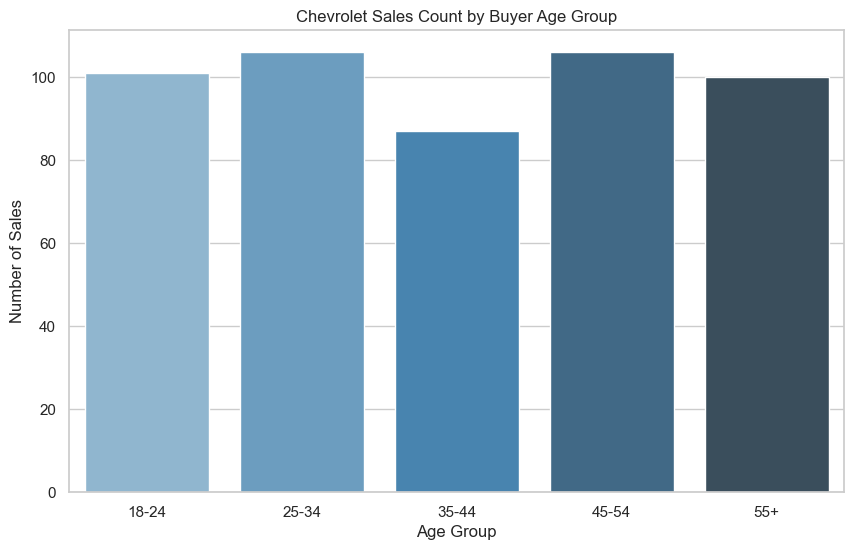

In [6]:
# ===========================
# 6) Plot sales distribution by age group
# ===========================
plt.figure(figsize=(10, 6))
sns.countplot(x="Buyer_Age_Group", data=df_chevrolet_uk, order=age_groups, palette="Blues_d")
plt.title("Chevrolet Sales Count by Buyer Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Sales")
plt.show()

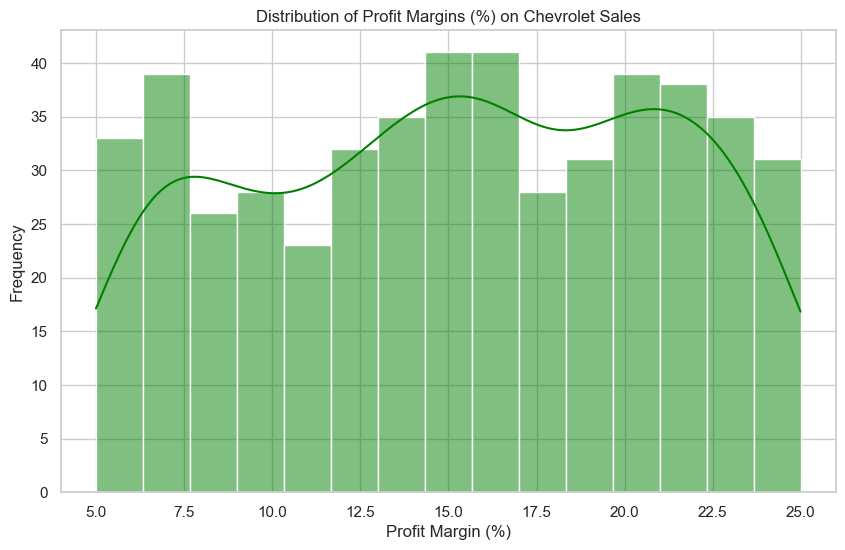

In [7]:
# ===========================
# 7) Profit margin distribution
# ===========================
plt.figure(figsize=(10, 6))
sns.histplot(df_chevrolet_uk["Profit_Margin_%"], bins=15, kde=True, color="green")
plt.title("Distribution of Profit Margins (%) on Chevrolet Sales")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.show()